In [1]:
from PIL import Image, ImageDraw, ImageFont

In [3]:
def quad_curve(t, p0, p1, p2):
    def point(index):
        first_grp = ((1.0 - t) ** 2.0) * p0[index]
        second_grp = 2.0 * (1.0 - t) * t * p1[index]
        third_grp = (t ** 2.0) * p2[index]
        
        return first_grp + second_grp + third_grp
        
    x = point(0)
    y = point(1)

    return x, y

In [4]:
def cubic_curve(t, p0, p1, p2, p3):
    def point(index):
        first_grp = ((1.0 - t) ** 3.0) * p0[index]
        second_grp = 3.0 * ((1.0 - t) ** 2.0) * t * p1[index]
        third_grp = 3.0 * (1.0 - t) * (t ** 2.0) * p2[index]
        fourth_grp = (t ** 3) * p3[index]
        
        return first_grp + second_grp + third_grp + fourth_grp
        
    x = point(0)
    y = point(1)

    return x, y

In [6]:
quad_p0 = (175, 500)
quad_p1 = (200, 300)
quad_p2 = (400, 550)

cubic_p0 = (375, 300)
cubic_p1 = (450, 550)
cubic_p2 = (550, 450)
cubic_p3 = (575, 350)

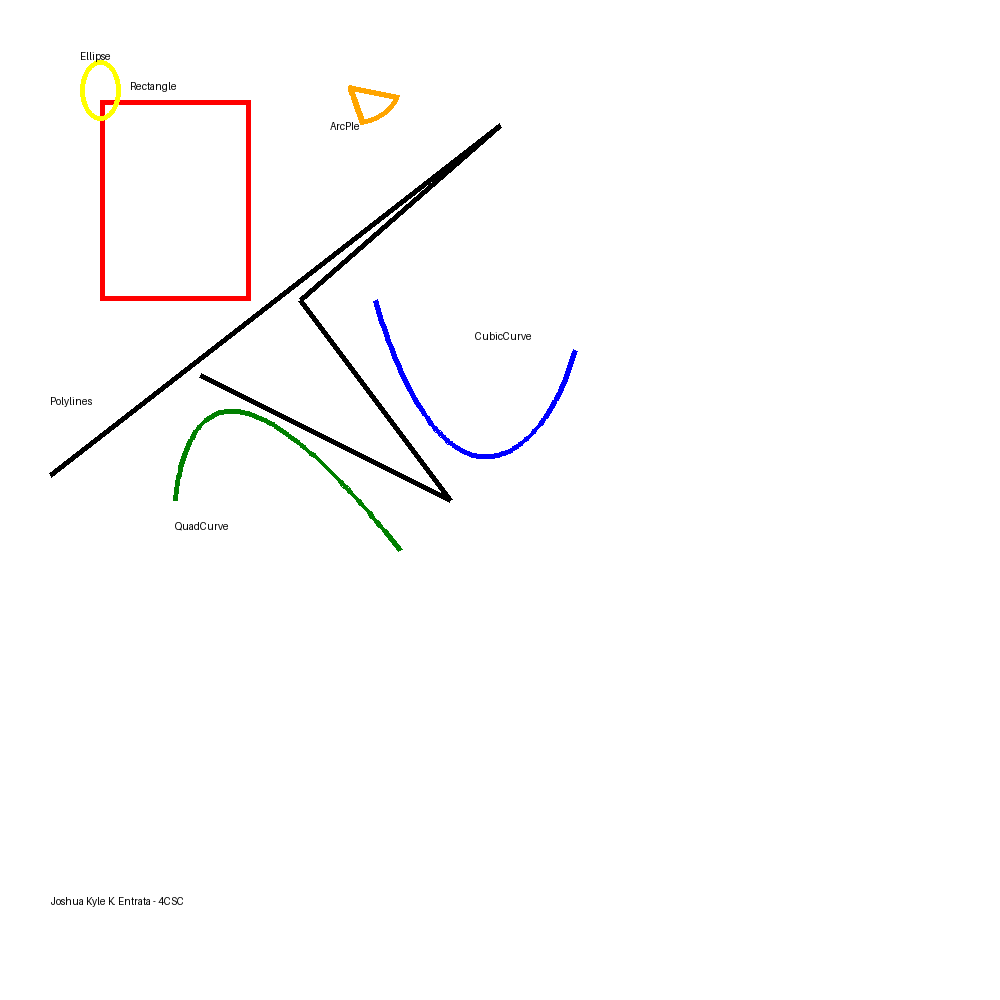

In [17]:
image = Image.new('RGB', (1000, 1000), (255, 255, 255))
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

draw.line((50, 475, 500, 125), fill='black', width=5)
draw.line((500, 125, 300, 300), fill='black', width=5)
draw.line((300, 300, 450, 500), fill='black', width=5)
draw.line((450, 500, 200, 375), fill='black', width=5)
draw.text((50, 395), 'Polylines', font=font, fill='black')

quad_points = [quad_curve(t, quad_p0, quad_p1, quad_p2) for t in [(i/100) for i in range(101)]]
draw.line(quad_points, fill='green', width=5)
draw.text((175, 520), 'QuadCurve', font=font, fill='black')

cubic_points = [cubic_curve(t, cubic_p0, cubic_p1, cubic_p2, cubic_p3) for t in [(i/100) for i in range(101)]]
draw.line(cubic_points, fill='blue', width=5)
draw.text((475, 330), 'CubicCurve', font=font, fill='black')

draw.rectangle([(100, 100), (250, 300)], outline='red', width=5)
draw.text((130, 80), 'Rectangle', font=font, fill='black')

draw.ellipse([(80, 60), (120, 120)], outline='yellow', width=5)
draw.text((80, 50), 'Ellipse', font=font, fill='black')

draw.pieslice([(300, 50), (400, 125)], start=15, end=75, outline='orange', width=5)
draw.text((330, 120), 'ArcPIe', font=font, fill='black')

draw.text((50, 895), 'Joshua Kyle K. Entrata - 4CSC', font=font, fill='black')


image